In [28]:
!pip -q install tensorflow tensorflow_io

C:\Users\Jorge\anaconda3\envs\tensorflow\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedWriter name=5>
  return process_handler(cmd, _system_body)
C:\Users\Jorge\anaconda3\envs\tensorflow\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)
C:\Users\Jorge\anaconda3\envs\tensorflow\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  return process_handler(cmd, _system_body)


In [43]:
import os
from pathlib import Path
from IPython.core.display import HTML, display
import matplotlib.pyplot as plt 
import tensorflow as tf
import librosa
from librosa.display import specshow
import numpy as np

In [7]:
DATASET_PATH = "./data"

GENRES_PATH = f"{DATASET_PATH}/genres_original"

GENRES = os.listdir(GENRES_PATH)

In [8]:
sample_path = f"{DATASET_PATH}/genres_original/blues/blues.00000.wav"

signal, sr = librosa.load(sample_path)



# Track Wave: 

In [23]:
def plot_wave(signal):
    plt.suptitle("Track Sound Wave")
    plt.xlabel('Samples')
    plt.plot(signal)
    plt.show()  

Track Sample Rate: 22050 samples/second
Track Total Samples: 661794
Track Length: 30.013333333333332


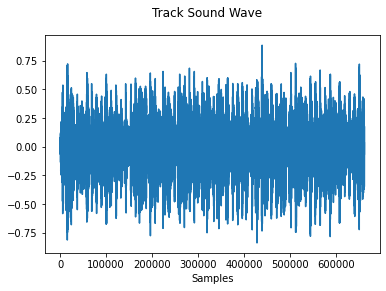

In [24]:

print(f"Track Sample Rate: {sr} samples/second")
print(f"Track Total Samples: {len(signal)}")
print(f"Track Length: { len(signal) / sr}")
plot_wave(signal)

## Spectogram

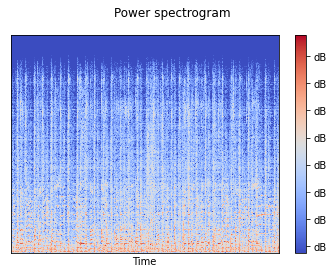

In [35]:
def plot_spectrogram(signal, y_axis=None):
    spectrogram = librosa.amplitude_to_db(librosa.stft(signal))
    specshow(spectrogram, y_axis=y_axis)
    plt.colorbar(format="dB")
    axis_title = y_axis if y_axis is not None else ""
    plt.suptitle(f"Power {axis_title} spectrogram")
    plt.xlabel("Time")
    plt.show()

plot_spectrogram(signal)



C:\Users\Jorge\anaconda3\envs\tensorflow\lib\site-packages\librosa\util\utils.py:2099: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.dtype(np.float): np.complex,
C:\Users\Jorge\anaconda3\envs\tensorflow\lib\site-packages\librosa\util\utils.py:2099: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.dtype(np.float): np.complex,
C

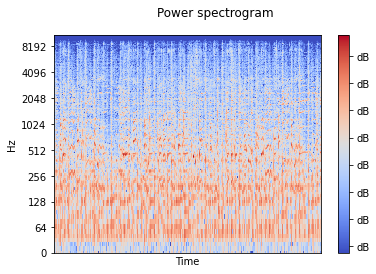

In [36]:
plot_spectrogram(signal, "log")

## MFCC

In [60]:
N_MFCC = 13
def plot_mfcc(mfccs, sr, delta=0, coefficients=N_MFCC):

    if delta:
        mfccs = librosa.feature.delta(mfccs, order=delta)
    
    specshow(mfccs,sr=sr)
    plt.colorbar()
    plt.suptitle(f"MFCC with {coefficients} coefficients {f'and {delta f"asdf"} derivative(s)' if delta else ''}")
    plt.xlabel("Time")
    plt.show()

MFCC len (13, 1293)
Signal Samples: (661794,)


C:\Users\Jorge\anaconda3\envs\tensorflow\lib\site-packages\librosa\util\utils.py:2099: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.dtype(np.float): np.complex,
C:\Users\Jorge\anaconda3\envs\tensorflow\lib\site-packages\librosa\util\utils.py:2099: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.dtype(np.float): np.complex,


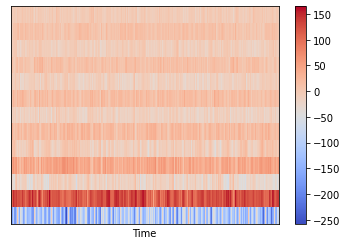

In [42]:


mfccs = librosa.feature.mfcc(y=signal, n_mfcc=N_MFCC, sr=sr)
print(f"MFCC len {mfccs.shape}")
print(f"Signal Samples: {signal.shape}")
plot_mfcc(mfccs, sr)


## Track Split

In [55]:
N_SPLITS = 20

samples_per_split = len(signal) // N_SPLITS
max_split = samples_per_split * N_SPLITS

print(f"Trimmed {len(signal) - max_split} samples")

splits = np.array_split(signal[:max_split], N_SPLITS)

for x in splits: print(x.shape)



Trimmed 14 samples
(33089,)
(33089,)
(33089,)
(33089,)
(33089,)
(33089,)
(33089,)
(33089,)
(33089,)
(33089,)
(33089,)
(33089,)
(33089,)
(33089,)
(33089,)
(33089,)
(33089,)
(33089,)
(33089,)
(33089,)


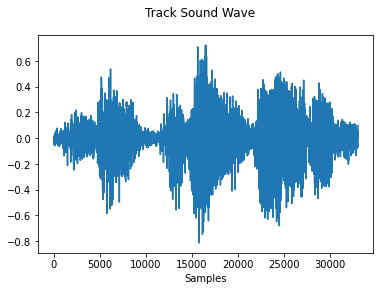

C:\Users\Jorge\anaconda3\envs\tensorflow\lib\site-packages\librosa\util\utils.py:2099: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.dtype(np.float): np.complex,
C:\Users\Jorge\anaconda3\envs\tensorflow\lib\site-packages\librosa\util\utils.py:2099: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.dtype(np.float): np.complex,
C

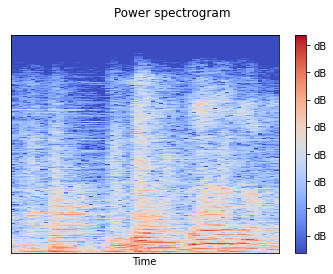

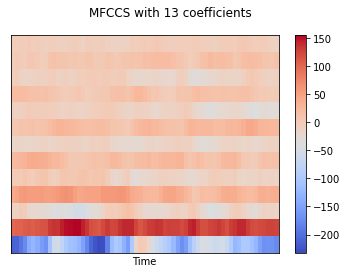

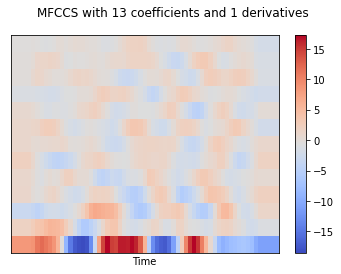

In [61]:
plot_wave(splits[0])
plot_spectrogram(splits[0])
mfccs = librosa.feature.mfcc(y=splits[0], n_mfcc=N_MFCC, sr=sr)
plot_mfcc(mfccs, sr, delta=0)
plot_mfcc(mfccs, sr, delta=1)